In [1]:
import tweepy
import requests
import json
from dotenv import load_dotenv
import os

Setup Twitter API

In [2]:
load_dotenv()
consumer_key = os.getenv("consumer_key")
consumer_secret = os.getenv("consumer_secret")
access_token = os.getenv("access_token")
access_token_secret = os.getenv("access_token_secret")

twitter_auth_keys = {
        "consumer_key"        : consumer_key,
        "consumer_secret"     : consumer_secret,
        "access_token"        : access_token,
        "access_token_secret" : access_token_secret
}

In [3]:
auth = tweepy.OAuthHandler(
            twitter_auth_keys['consumer_key'],
            twitter_auth_keys['consumer_secret']
            )

auth.set_access_token(
        twitter_auth_keys['access_token'],
        twitter_auth_keys['access_token_secret']
        )

api = tweepy.API(auth)

Get tweet url from loaded lion 

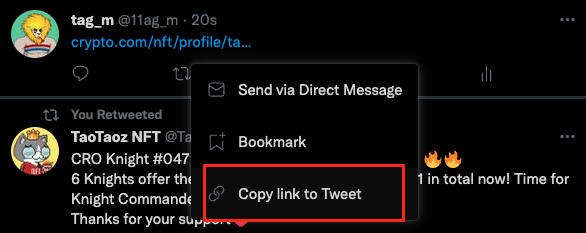

In [4]:
tweet_url = "https://twitter.com/11ag_m/status/1495827201157120000?s=20&t=V5Fxh79JJJTSZrGJ-1nDVw"

Get twitter username from tweet

In [5]:
tweet_id = tweet_url.split("status/")[1].split("?")[0]
tweet = api.get_status(tweet_id)
twitter_username = tweet.user.screen_name
twitter_username

'11ag_m'

Get cdc_username from tweet

In [6]:
cdc_profile_url = tweet.entities['urls'][0]['expanded_url']
username = cdc_profile_url.split("profile/")[1]
username

'tag_m'

Graphql API

In [7]:
cdc_url = "https://crypto.com/nft-api/graphql"

In [8]:
def getUser(id) : return {
    "operationName": "User",
    "variables": {
        "id": id,
        "cacheId": "getUserQuery-Profile-tag_m"
    },
    "query": "query User($id: ID!, $cacheId: ID) {\n  public(cacheId: $cacheId) {\n    user(id: $id) {\n      uuid\n      verified\n      id\n      username\n      bio\n      displayName\n      instagramUsername\n      facebookUsername\n      twitterUsername\n      isCreator\n      canCreateAsset\n      croWalletAddress\n      avatar {\n        url\n        __typename\n      }\n      cover {\n        url\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
}

Get CDC User Profile

In [9]:
getUser(username)
response = requests.post(cdc_url,json=getUser(username))

Check if cdc_twitter_username matches twitter_username from tweet

In [10]:
response.json()['data']['public']['user']

{'uuid': 'a8dd030b-c131-451b-a7bc-5243d5a640a8',
 'verified': False,
 'id': 'tag_m',
 'username': 'tag_m',
 'bio': 'test-token',
 'displayName': None,
 'instagramUsername': None,
 'facebookUsername': None,
 'twitterUsername': '11ag_m',
 'isCreator': False,
 'canCreateAsset': False,
 'croWalletAddress': 'cro16fs4axkdc8x4ck0zgrdwdqwceuc3kgucr0cg2r',
 'avatar': {'url': 'https://d2vi0z68k5oxnr.cloudfront.net/9022a9ea-ba14-4401-a641-b82d132a422c/original.jpeg',
  '__typename': 'Attachment'},
 'cover': None,
 '__typename': 'User'}

In [11]:
cdc_twitter_username = response.json()['data']['public']['user']['twitterUsername']
cdc_twitter_username

'11ag_m'

In [12]:
cdc_twitter_username == twitter_username

True

Get croWalletAddress from tweet 

In [13]:
croWalletAddress = response.json()['data']['public']['user']['croWalletAddress']
croWalletAddress

'cro16fs4axkdc8x4ck0zgrdwdqwceuc3kgucr0cg2r'

Get assets from lion

In [14]:
cro_explorer_url = "https://crypto.org/explorer/api/v1/nfts/accounts/"+croWalletAddress+"/tokens?pagination=offset&page=1&limit=1000&order=height.desc"
response = requests.get(cro_explorer_url)
assets = response.json()['result']

Check if lion has true Loaded Lion

In [15]:
loaded_lions = [x for x in assets if x['tokenName'].split(" #")[0] == 'Loaded Lion']
true_loaded_lions = [x for x in loaded_lions if json.loads(x['tokenData'])["collectionId"] == '82421cf8e15df0edcaa200af752a344f']
len(true_loaded_lions)>0

True